# Task 1

In [29]:
# To start with, we import the necessary tools
from skimage import color,io,exposure
from skimage.filters import gaussian,unsharp_mask
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgba2rgb
from skimage.util import img_as_float


In [30]:
#We read the image and we turn it into rgb (as it is png in the beginning)
trees = io.imread("colorful_trees.png")
trees = color.rgba2rgb(trees)

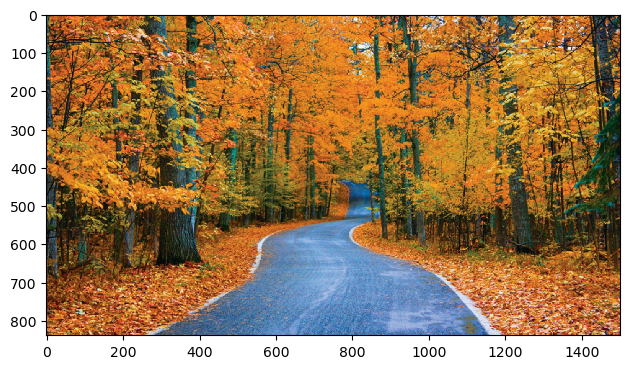

In [31]:
#Display 
io.imshow(trees)
io.show()

In [32]:
#Extract each channel
red_channel = trees[:, :, 0]
green_channel = trees[:, :, 1]
blue_channel = trees[:, :, 2]

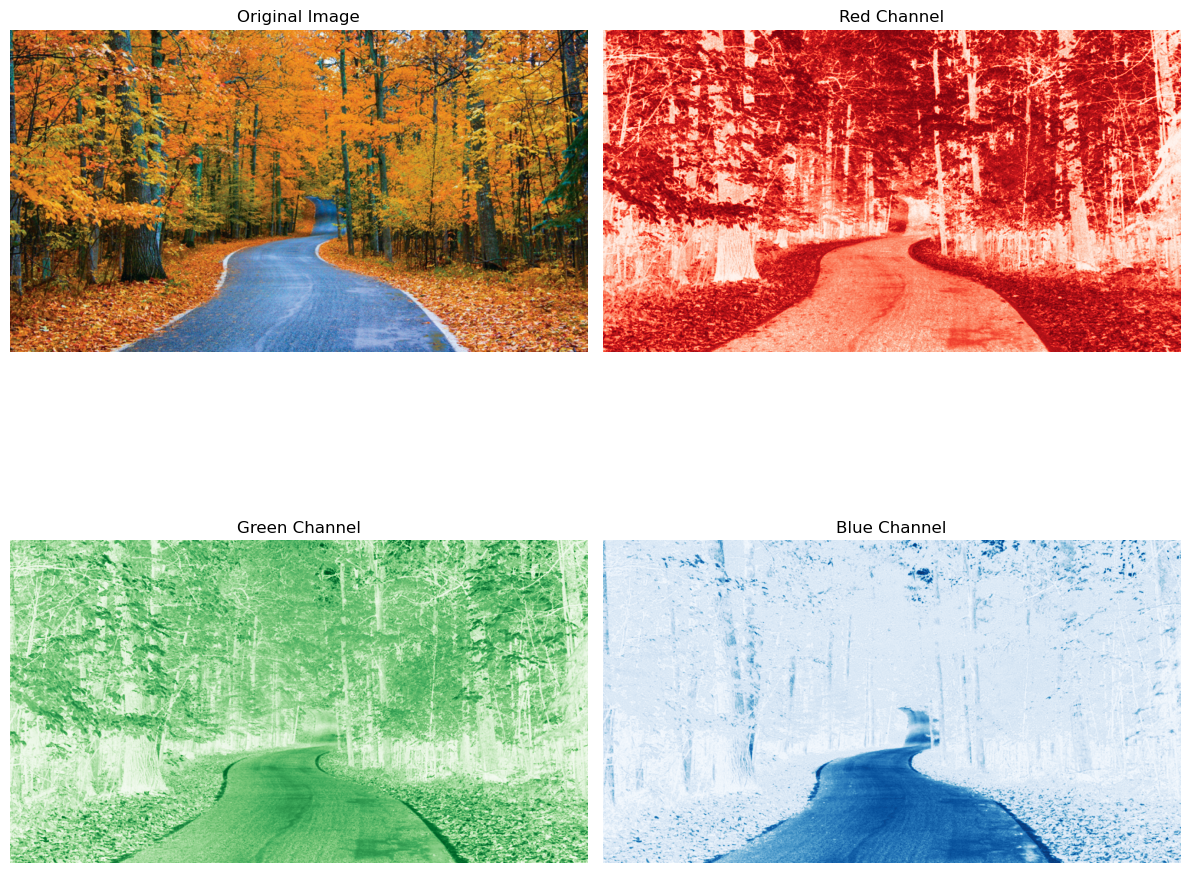

In [33]:
#Just a plot to display all of them together (taken from perplexity)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(trees)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(red_channel, cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

axes[1, 0].imshow(green_channel, cmap='Greens')
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

axes[1, 1].imshow(blue_channel, cmap='Blues')
axes[1, 1].set_title('Blue Channel')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [34]:
#Histogram equalization for each channel
red_eq = exposure.equalize_hist(red_channel)
green_eq = exposure.equalize_hist(green_channel)
blue_eq = exposure.equalize_hist(blue_channel)

#Recombining the channels
tree_eq = np.stack((red_eq, green_eq, blue_eq), axis=-1)

(-0.5, 1499.5, 837.5, -0.5)

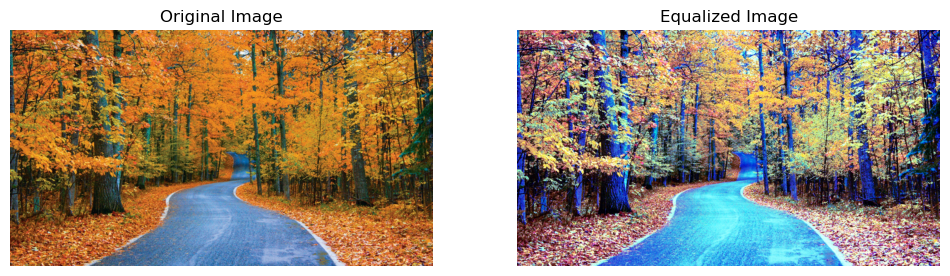

In [35]:
#Displaying the images
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

axes[0].imshow(trees)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(tree_eq)
axes[1].set_title('Equalized Image')
axes[1].axis('off')

In [36]:
#Contrast stretching
red_stretched = exposure.rescale_intensity(red_channel)
green_stretched = exposure.rescale_intensity(green_channel)
blue_stretched = exposure.rescale_intensity(blue_channel)

#Recombining the channels
tree_stretch = np.stack((red_stretched, green_stretched, blue_stretched), axis=-1)

(-0.5, 1499.5, 837.5, -0.5)

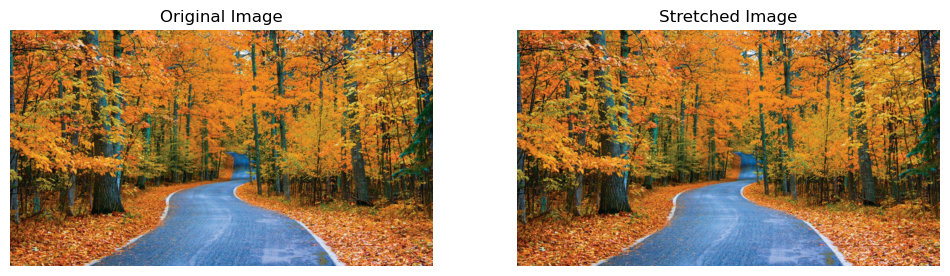

In [37]:
#Displaying the images
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

axes[0].imshow(trees)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(tree_stretch)
axes[1].set_title('Stretched Image')
axes[1].axis('off')

# Task 2

In [38]:
#Reading the image
tree = io.imread("colorful_trees.png")
tree = color.rgba2rgb(tree)

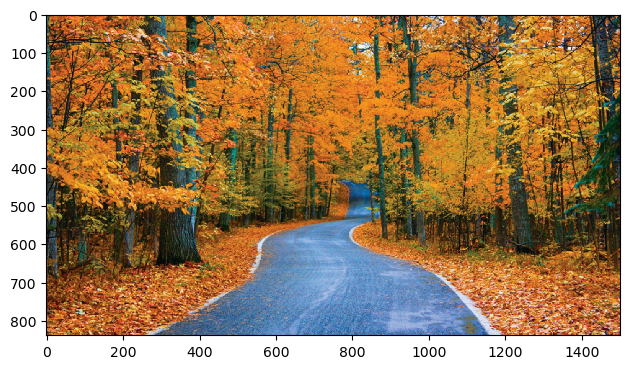

In [39]:
#Displaying the image
io.imshow(tree)
io.show()

In [40]:
#Converting the image to hsl
tree_hsl = color.rgb2hsv(tree)

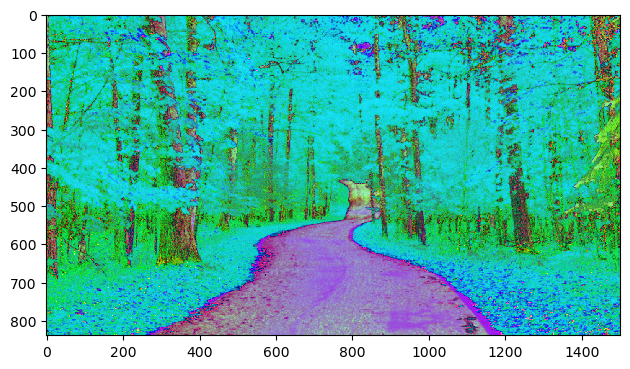

In [41]:
#Displaying the image
io.imshow(tree_hsl)
io.show()

In [42]:
#Extracting the L channel
l_channel = tree_hsl[:, :, 2]

In [43]:
#Equalizing the L channel
l_equalised = exposure.equalize_hist(l_channel)

In [44]:
#Contrast stretching the L channel
l_stretched = exposure.rescale_intensity(l_channel)

In [45]:
#Recombining the channels
tree_hsl_eq = np.stack((tree_hsl[:, :, 0], tree_hsl[:, :, 1], l_equalised), axis=-1)
tree_hsl_stretch = np.stack((tree_hsl[:, :, 0], tree_hsl[:, :, 1], l_stretched), axis=-1)

(-0.5, 1499.5, 837.5, -0.5)

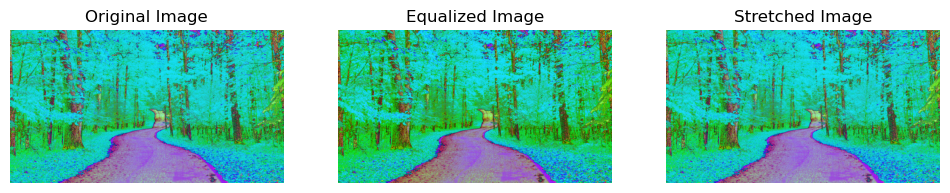

In [46]:
#Displaying the images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))

axes[0].imshow(tree_hsl)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(tree_hsl_eq)
axes[1].set_title('Equalized Image')
axes[1].axis('off')

axes[2].imshow(tree_hsl_stretch)
axes[2].set_title('Stretched Image')
axes[2].axis('off')

# Task 3

### Blurring

In [47]:
#Reading the image
tree = io.imread("colorful_trees.png")
tree = rgba2rgb(tree)
tree_as_float = img_as_float(tree)

In [48]:
#Separating RGB using the same method as before
red_channel = trees[:, :, 0]
green_channel = trees[:, :, 1]
blue_channel = trees[:, :, 2]

In [49]:
#Define the function to blur the channel
def blur_channel(channel, sigma):
    return gaussian(channel, sigma=sigma)

In [50]:
#Blurring the channels sigma = 1
red_sigma1 = blur_channel(red_channel, 1)
green_sigma1 = blur_channel(green_channel, 1)
blue_sigma1 = blur_channel(blue_channel, 1)

In [51]:
#Recombining the channels
tree_sigma1 = np.stack((red_sigma1, green_sigma1, blue_sigma1), axis=-1)

In [52]:
#Blurring the channels sigma = 3
red_sigma3 = blur_channel(red_channel, 3)
green_sigma3 = blur_channel(green_channel, 3)
blue_sigma3 = blur_channel(blue_channel, 3)

In [53]:
#Recombining the channels
tree_sigma3 = np.stack((red_sigma3, green_sigma3, blue_sigma3), axis=-1)

In [54]:
#Blurring the channels sigma = 5
red_sigma5 = blur_channel(red_channel, 5)
green_sigma5 = blur_channel(green_channel, 5)
blue_sigma5 = blur_channel(blue_channel, 5)

In [55]:
#Recombining the channels
tree_sigma5 = np.stack((red_sigma5, green_sigma5, blue_sigma5), axis=-1)

In [59]:
#Blurring the channels sigma = 10
red_sigma10 = blur_channel(red_channel, 10)
green_sigma10 = blur_channel(green_channel, 10)
blue_sigma10 = blur_channel(blue_channel, 10)

In [60]:
#Recombining the channels
tree_sigma10 = np.stack((red_sigma10, green_sigma10, blue_sigma10), axis=-1)

(-0.5, 1499.5, 837.5, -0.5)

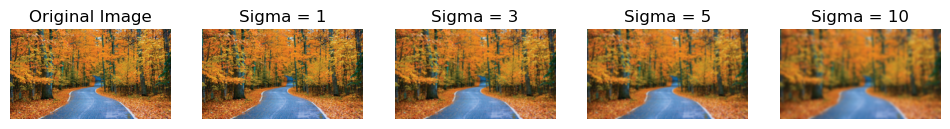

In [61]:
#Displaying the images
fig, axes = plt.subplots(1,5, figsize=(12, 12))

axes[0].imshow(tree)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(tree_sigma1)
axes[1].set_title('Sigma = 1')
axes[1].axis('off')

axes[2].imshow(tree_sigma3)
axes[2].set_title('Sigma = 3')
axes[2].axis('off')

axes[3].imshow(tree_sigma5)
axes[3].set_title('Sigma = 5')
axes[3].axis('off')

axes[4].imshow(tree_sigma10)
axes[4].set_title('Sigma = 10')
axes[4].axis('off')

### Sharpening

In [64]:
#Define the function to sharpen the channel
def sharpen_channel(channel, alpha):
    return unsharp_mask(channel, radius=1, amount=alpha)

In [68]:
#Sharpening the channels
red_sharpened = sharpen_channel(red_channel, 10)
green_sharpened = sharpen_channel(green_channel, 10)
blue_sharpened = sharpen_channel(blue_channel, 10)

In [69]:
#Recombining the channels
tree_sharpened = np.stack((red_sharpened, green_sharpened, blue_sharpened), axis=-1)

(-0.5, 1499.5, 837.5, -0.5)

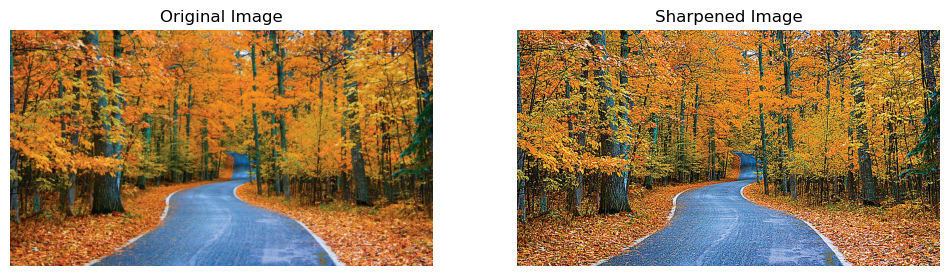

In [70]:
#Displaying the images
fig, axes = plt.subplots(1,2, figsize=(12, 12))

axes[0].imshow(tree)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(tree_sharpened)
axes[1].set_title('Sharpened Image')
axes[1].axis('off')